앞의 두 예제는 분류 문제 입니다. 입력 데이터 포인트의 개별적인 레이블 하나를 예측하는 것이 목적입니다. 또 다른 종류의 머신 러닝 문제는 개별적인 레이블 대신에 연속적인 값을 예측하는 회귀입니다. 예를들어 기상 데이터가 주어졌을 때 내일 기온을 예측하거나, 소프트웨어 명세가 주어졌을 때 소프트웨어 프로젝트가 완료될 시간을 예측하는 것입니다.

### 보스턴 주택 가격 데이터셋
1970년 중반 보스턴 외각 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측해 보겠습니다. 여기서 사용할 데이터셋은 이전 2개의 예제와 다릅니다. 데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로, 102개는 테스트 샘플로 나뉘어 있습니다. 입력 데이터에 있는 각 특성(feature)(예를 들어 범죄율)은 스케일이 서로 다릅니다. 어떤 값은 0과 1 사이의 비율을 나타내고, 어떤 것은 1과 12 사이의 값을 가지거나 1과 100 사이의 값을 가집니다.

In [1]:
#보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)


여기서 볼 수 있듯이 404개의 훈련 샘플과 102개의 테스트 샘플이 있고 모두 13개의 수치 특성이 있습니다. 이 특성들은 1인당 범죄율, 주택당 평균 방의 개수, 고속도로 접근성 등입니다.

타깃은 주택의 중간 가격으로 천 달러 단위입니다.

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

이 가격은 일반적으로 1만 달러에서 5만 달러 사이입니다. 저렴하게 느껴질 텐데 1970년대 중반이라는 것을 기억하세요. 아직 인플레이션에 영향을 받지 않은 가격입니다.

### 데이터 준비

상이한 스케일을 가진 값을 신경망에 주입하면 문제가 됩니다. 네트워크가 이런 다양한 데이터에 자동으로 맞추려고 할 수 있지만 이는 확실히 학습을 더 어렵게 만듭니다. 이런 데이터들을 다룰때 대표적인 방법은 특성별로 정규화를 하는 것ㅇ비니다. 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해서 특성의 평균을 빼고 표준 편차로 나눕니다. 특성의 중앙이 0근처에 맞추어지고 표준 편차가 1이 됩니다. 넘파이를 사용하면 간단하게 할 수 있습니다.

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 주목하세요. 머신 러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안 됩니다. 데이터 정규화처럼 간단한 작업조차도 그렇습니다.

### 모델 구성

샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용하겠습니다. 일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법입니다.

In [6]:
from keras import models
from keras import layers

def build_model():    #동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없습니다(선형 층이라고 부릅니다). 이것이 전형적인 스칼라 회기(하나의 연속적인 값을 예측하는 회귀)를 위한 구성입니다. 활성화 함수를 적용하면 출력 값의 범위를 제한하게 됩니다. 예를 들어 마지막 층에 sigmoid 활성화 함수를 적용하면 네트워크가 0과1사이의 값을 예측하도록 학습될 것입니다. 여기서는 마지막 층이 순수한 선형이므로 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습됩니다.

이 모델은 mse 손실 함수를 사용하여 컴파일 합니다. 이 함수는 평균 제곱 오차(mean squared error) 의 약어로 예측과 타깃 사이 거리의 제곱입니다, 회귀 문제에서 널리 사용되는 손실 함수 입니다.

훈련하는 동안 모니터링을 위해 새로운 지표인 평균 절대 오차(Mean Absolute Error, MAE)를 측정합니다. 이는 예측과 타깃 사이 거리의 절댓값입니다. 예를 들어 이 예제에서 MAE가 0.5면 예측이 평균적으로 500달러 정도 차이가 난다는 뜻입니다.

### K-겹 검증을 사용한 훈련 검증

(훈련에 사용할 에포크의 수 같은) 매개변수들을 조정하면서 모델을 평가하기 위해 이전 예제에서 했던 것처럼 데이터를 훈련 세트와 검증 세트로 나눕니다. 데이터 포인트가 많지 않기 때문에 검증 세트도 매우 작아집니다.(약 100개의 샘플). 결국 검증 세트의 분할에 대한 검증 점수의 분산이 높습니다. 이렇게 되면 신뢰 있는 모델 평가를 할 수 없습니다.

이런 상황에서 가장 좋은 방법은 K-겹 교차 검증(K-fold cross-validation)을 사용하는 것입니다데이터를 K개의 분할 (즉 폴드)로 나누고 (일반적으로 K= 4 OR 5), K개의 모델을 각각 만들어 K -1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법입니다. 모델의 검증 점수는 K개의 검증 점수 평균이 됩니다. 코드로 보면 이해하기 쉽습니다.

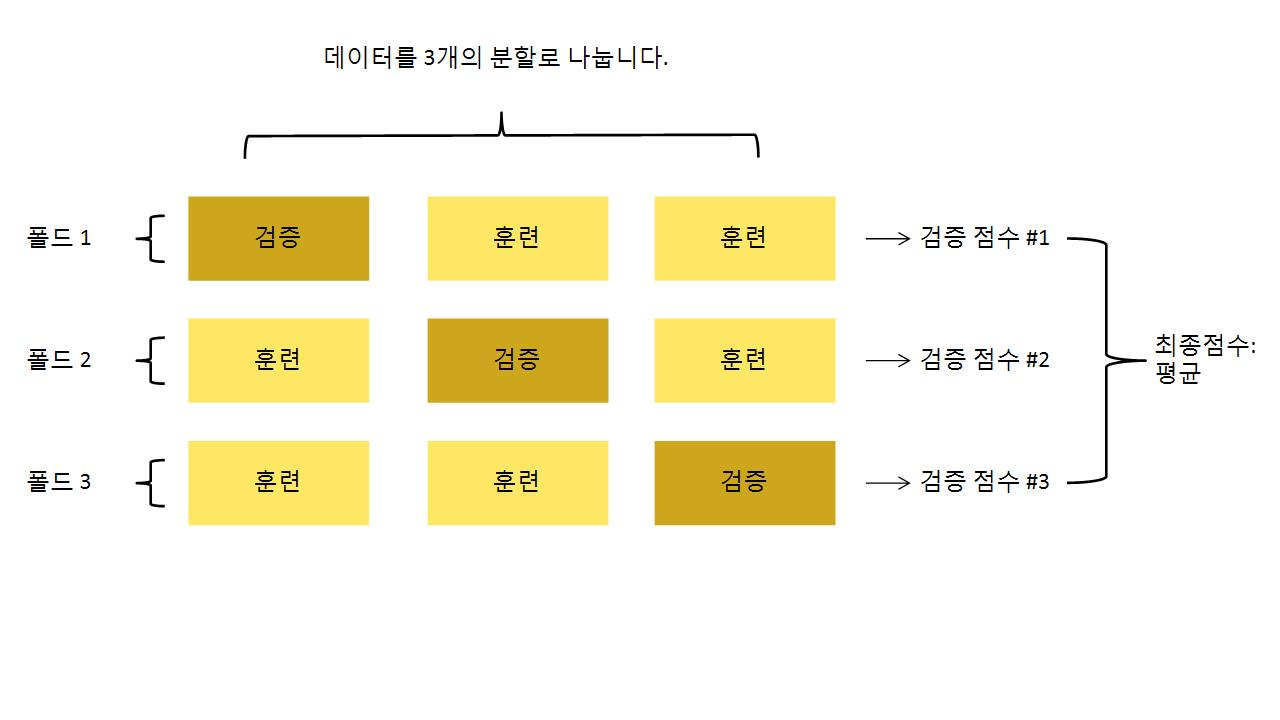

In [7]:
# K-겹 검증하기
import numpy as np

k=4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리중인 폴드 #',i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(        #훈련 데이터 준비: 다른 분할 전체
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0
  )
  model = build_model()     # 케라스 모델 구성(컴파일 포함)
  model.fit(partial_train_data, partial_train_targets,                # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않는다.)
            epochs = num_epochs, batch_size=1, verbose=0 )
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


num_epochs = 100으로 실행하면 다음 결과를 얻습니디ㅏ.

In [8]:
all_scores

[2.373638391494751, 3.0510590076446533, 2.789705991744995, 2.6585402488708496]

In [9]:
np.mean(all_scores)

2.7182359099388123

검증 세트가 다르므로 확실히 검증 점수가 2.1에서 2.9까지 변화가 큽니다. 평균값(2.4)이 각각의 점수보다 훨씬 신뢰할 만 합ㄴ디ㅏ. 이것이 K-겹 교차 검증의 핵심입니다. 이 예에서는 평균적으로 2400달러 정도가 납니다. 주택 가격의 범위가 1만 달러에서 5만 달러 사이인 것을 감안하면 비교적 큰 값입니다.

신경망을 조금 더 오래 500에프크 동안 훈련해 보죠. 각 에포크마다 모델이 얼마나 개선되는지 기록하기 위해 훈련 루프를 조금 수정해서 에포크의 검증 점수를 로그에 저장하겠습니다.

In [10]:
num_epochs = 500
all_mae_histories =[]
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]  #검증 데이터 준비: k번째 분할
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate(       #훈련 데이터 준비: 다른 분할 전체
      [train_data[:i*num_val_samples],
       train_data[(i+1)* num_val_samples:]],
       axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0
  )

  model = build_model()  #케라스 모델 구성(컴파일 포함)
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_targets),
                      epochs=num_epochs, batch_size = 1, verbose = 0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리중인 폴드 # 0


KeyError: ignored

책대로 따라 했는데 오류가 나는것을 볼 수 있다. 여기서 해 줘야 할 것이 있다.

In [ ]:
from keras import backend as K

# 메모리 해제
K.clear_session()

# Keras 백엔드
### "백앤드"는 무엇인가요?
Keras는 딥러닝 모델을 개발하기 위한 고수준의 구성요성 요소를 제공하는 모델 레벨의 라이브러리입니다. Keras는 텐서 곱셈, 합성곱 등의 저수준의 연산을 제공하지 않습니다. 대신 Keras의 "백엔드 엔진" 역할을 하는 특수하고 잘 최적화 된 텐서 라이브러리에 의존합니다. 하나의 단일 텐서 라이브러리를 선택하고 Keras 구현을 해당 라이브러리에 묶는 대신, Keras는 모듈 방식으로 문제를 처리하여 여러 다른 백엔드 엔진들을 Keras에 매끄럽게 연결할 수 있게 합니다.

https://keras.io/ko/backend/

이 사이트를 보시면 clear_session에 관한 설명이 나옵니다. 그런데 다시 돌려 보시면 또 다시 안됩니다. 그래서 

https://stackoverflow.com/questions/60053547/how-to-resolve-keyerror-val-mean-absolute-error-keras-2-3-1-and-tensorflow-2

이곳을 찾아봤는데 이것을 토대로 고친 코드가 바로 밑 이거입니다.

In [ ]:
from keras import backend as K

# 메모리 해제
K.clear_session()

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history["mae"]
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


그런 다음 모든 폴드에 대해 에포크의 MAE점수 평균을 계산합니다.

In [ ]:
#K-겹 검증 점수 평균을 기록하기
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

이걸 그래프로 나타내면

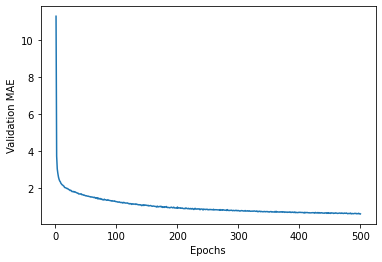

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+ 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

책이랑은 좀 다르게 나왔는데 일단 책을 따라 가겠습니다.

이 그래프는 범위가 크고 변동이 심하기 떄문에 보기가 좀 어렵습니다. 다음과 같이 해 보죠

 * 곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외시킵니다.
 * 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체합니다.

지수 이동 평균은 시계열 데이터를 부드럽게 만드는 기법 중 하나입니다. 밑의 코드의 7번째 줄에서 이전에 계산된 이동 평균에 factor를 곱하고 현제 포인트에 (1-factor)를 곱해 합산한 것을 가리킵니다.

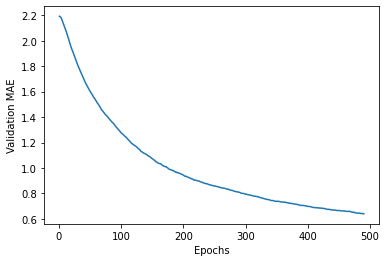

In [ ]:
#처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

네 전 왜 책이랑 다른 그레프가 나오는지 모르겠습니다.
예상하는것은 데이터 셋이 바뀌였거나 데이터가 더 추가되어서 밑으로 내려가는 경향이 있는가 아니면 딥러닝 하는 방식이 바뀌었을 수도 있죠

이 책이 원하는 것은 과대적합이 되는가 안되는가? 였습니다.
하지만 저는 시행을 하면 할수록 과소적합이 되었습니다. 컴파일 하는 과정에서 고친 부분이 문제가 있었던것 같던데 잘 이해가 되지 않네요. 멘토님에게 물어봐야겠습니다.

In [ ]:
#최종모델 훈련하기
model = build_model() #새롭게 컴파일 된 모델을 얻습니다.
model.fit(train_data, train_targets,      #전체 데이터로 훈련시킵니다.
          epochs=80, batch_size = 16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.1773 - mae: 2.6962


# 정리

다음은 이 예제에서 배운 것들입니다.

* 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용합니다. 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수 입니다.
* 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다릅니다. 당연히 정확도 개념은 회귀에 적용되지 않습니다. 일반적인 회귀 지표는 평균 절대 오차(MAE)입니다.
* 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 합니다.
*가용한 데이터가 적다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법입니다.
*가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉층의 수를 줄인 모델이 좋습니다(일반적으로 1개 또는 2개)
